In [239]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
df1=pd.read_csv("Tunisian_House_Data.csv")

In [240]:
df1.location.unique()

array(['hammamet', 'mhamdya', 'siida', ..., 'manzah9', 'manzah8', 'Lac1'],
      dtype=object)

In [241]:
df1.shape


(13320, 8)

In [242]:
#area_type grouping
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [243]:
#next we moove to the data cleaning process
#suppression of comlumns
df2=df1.copy()
df2=df1.drop(['area_type','balcony','availability'],axis='columns')
df2.head()


,location,size,bath,total_m2,price_mDT
0,hammamet,2 BHK,2.0,98.1024,421.090504
1,mhamdya,4 Bedroom,5.0,241.5400,1293.341705
2,siida,3 BHK,2.0,133.7760,668.226548
3,aala,3 BHK,3.0,141.3009,1023.895517
4,kerouon sud,2 BHK,2.0,111.4800,549.670225


In [244]:

df2.isnull().sum()

location      1
size         16
bath         73
total_m2     46
price_mDT     0
dtype: int64

In [245]:

#drop any values(values with 0)
df3=df2.copy()
df3=df2.dropna()
df3.isnull().sum()

location     0
size         0
bath         0
total_m2     0
price_mDT    0
dtype: int64

In [246]:
df3.shape


(13200, 5)

In [247]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [248]:
#construction of a new colmumn in which contains the BHK values 
df3['BHK']=df3['size'].apply(lambda x :int(x.split(' ')[0]))

C:\Users\Walid\AppData\Local\Temp\ipykernel_12472\717991322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']=df3['size'].apply(lambda x :int(x.split(' ')[0]))


In [249]:
df3.head()

,location,size,bath,total_m2,price_mDT,BHK
0,hammamet,2 BHK,2.0,98.1024,421.090504,2
1,mhamdya,4 Bedroom,5.0,241.5400,1293.341705,4
2,siida,3 BHK,2.0,133.7760,668.226548,3
3,aala,3 BHK,3.0,141.3009,1023.895517,3
4,kerouon sud,2 BHK,2.0,111.4800,549.670225,2


In [250]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [251]:
df3[df3.BHK>20]

,location,size,bath,total_m2,price_mDT,BHK
1718,2ELECTRONIC CITY PHASE II,27 BHK,27.0,743.20,2478.904935,27
4684,dhahbya,43 Bedroom,40.0,222.96,7113.379378,43


In [252]:
df3.total_m2.unique()

array([ 98.1024 , 241.54   , 133.776  , ..., 116.91465,  71.9046 ,
       435.6081 ])

In [253]:
df4=df3.copy()
df4.loc[30]

location         fousena
size               4 BHK
bath                 4.0
total_m2        229.9275
price_mDT    2004.679643
BHK                    4
Name: 30, dtype: object

In [254]:
#Feature engeneering
df5=df4.copy()
df5['price_mDT_per_m2']=df5['price_mDT']/df5['total_m2']
df5.head()


,location,size,bath,total_m2,price_mDT,BHK,price_mDT_per_m2
0,hammamet,2 BHK,2.0,98.1024,421.090504,2,4.292357
1,mhamdya,4 Bedroom,5.0,241.5400,1293.341705,4,5.354565
2,siida,3 BHK,2.0,133.7760,668.226548,3,4.995115
3,aala,3 BHK,3.0,141.3009,1023.895517,3,7.246207
4,kerouon sud,2 BHK,2.0,111.4800,549.670225,2,4.930662


In [255]:
df6=df5.copy()
df6.head()

,location,size,bath,total_m2,price_mDT,BHK,price_mDT_per_m2
0,hammamet,2 BHK,2.0,98.1024,421.090504,2,4.292357
1,mhamdya,4 Bedroom,5.0,241.5400,1293.341705,4,5.354565
2,siida,3 BHK,2.0,133.7760,668.226548,3,4.995115
3,aala,3 BHK,3.0,141.3009,1023.895517,3,7.246207
4,kerouon sud,2 BHK,2.0,111.4800,549.670225,2,4.930662


In [256]:
df6.location=df6.location.apply(lambda x:x.strip())
location_state=df6.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_state


location
hesi farid               532
tela                     392
l mida                   302
aamdoun                  264
bradeaa                  232
                        ... 
T C PALYA MAIN ROAD        1
T C PALYA                  1
SURYANAGAR                 1
LAKKASANDRA EXTENSION      1
1 ANNASANDRAPALYA          1
Name: location, Length: 1283, dtype: int64

In [257]:
location_state_less_than_10=location_state[location_state<=10]
location_state_less_than_10
len(location_state_less_than_10)


1045

In [258]:
df6.location=df6.location.apply(lambda x :'other' if x in location_state_less_than_10 else x)
len(df6.location.unique())

239

In [259]:
df6.head(10)

,location,size,bath,total_m2,price_mDT,BHK,price_mDT_per_m2
0,hammamet,2 BHK,2.0,98.1024,421.090504,2,4.292357
1,mhamdya,4 Bedroom,5.0,241.5400,1293.341705,4,5.354565
2,siida,3 BHK,2.0,133.7760,668.226548,3,4.995115
3,aala,3 BHK,3.0,141.3009,1023.895517,3,7.246207
4,kerouon sud,2 BHK,2.0,111.4800,549.670225,2,4.930662
5,hesi farid,2 BHK,2.0,108.6930,409.558207,2,3.768027
6,sidi ali ben oun,4 BHK,4.0,253.8028,2198.680899,4,8.662950
7,fawar,4 BHK,4.0,306.5700,6466.708526,4,21.093742
8,kalaa khasba,3 BHK,3.0,121.6990,681.698857,3,5.601516
9,other,6 Bedroom,6.0,94.7580,3987.803591,6,42.084084


In [260]:
#outlier removal
#a bedroom must be around 300 sqft(27,871 m2) so we remove the bedrooms with aera less than 27,871
df6[df6.total_m2/df6.BHK<27.871].head()

,location,size,bath,total_m2,price_mDT,BHK,price_mDT_per_m2
9,other,6 Bedroom,6.0,94.7580,3987.803591,6,42.084084
45,benzert sud,8 Bedroom,9.0,55.7400,2155.569509,8,38.671861
58,tataouin sud,6 Bedroom,4.0,130.7103,1616.677131,6,12.368399
68,other,8 Bedroom,7.0,125.4150,916.117041,8,7.304685
70,other,3 Bedroom,3.0,46.4500,1077.784754,3,23.203116


In [261]:
df6.shape

(13200, 7)

In [262]:
df7=df6.copy()
df7=df6[~(df6.total_m2/df6.BHK<27.871)]
df7.shape

(12274, 7)

In [263]:
df7.price_mDT_per_m2.describe()

count    12274.000000
mean         7.206749
std          4.702361
min          0.310724
25%          4.872654
50%          6.106083
75%          7.918614
max        204.733380
Name: price_mDT_per_m2, dtype: float64

In [264]:
#we try to remove the anormal prices(like 0.096;63,64) by creating this function
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_mDT_per_m2)
        st=np.std(subdf.price_mDT_per_m2)
        reduced_df=subdf[(subdf.price_mDT_per_m2>(m-st))&(subdf.price_mDT_per_m2<=(st+m))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
    


In [265]:
df8=df7.copy()
df8=remove_pps_outliers(df7)
df8.shape

(10012, 7)

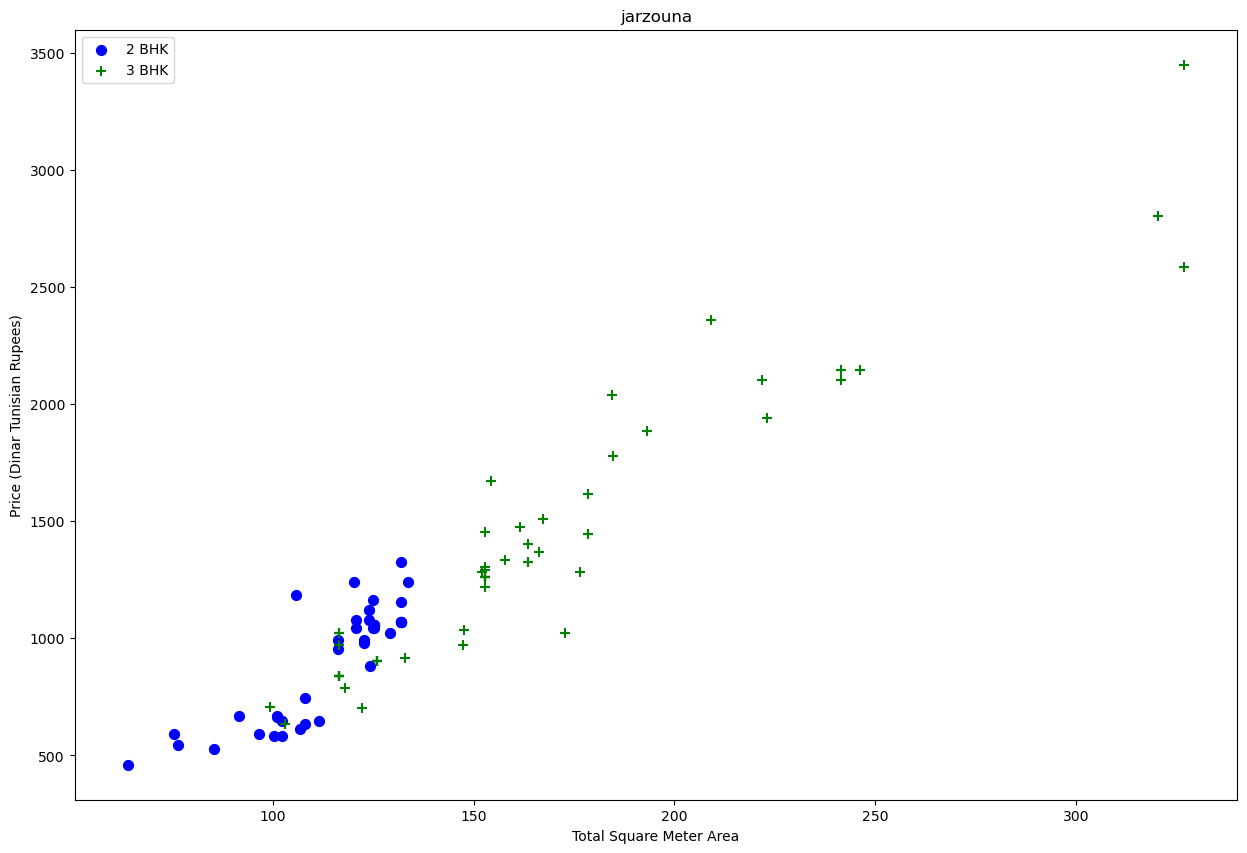

In [266]:
#function that plots houses with 2 and 3 bedrooms
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_m2,bhk2.price_mDT,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_m2,bhk3.price_mDT,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Meter Area")
    plt.ylabel("Price (Dinar Tunisian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df8,"jarzouna")

In [267]:
#we create a function in which we remove the houses with 2 bedrooms which less than the mean of houses with 1 bedrooms with the same area squre meter
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_mDT_per_m2),
                'std': np.std(bhk_df.price_mDT_per_m2),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_mDT_per_m2<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df9=df8.copy()
df9 = remove_bhk_outliers(df8)
# df8 = df7.copy()
df9.shape


(7160, 7)

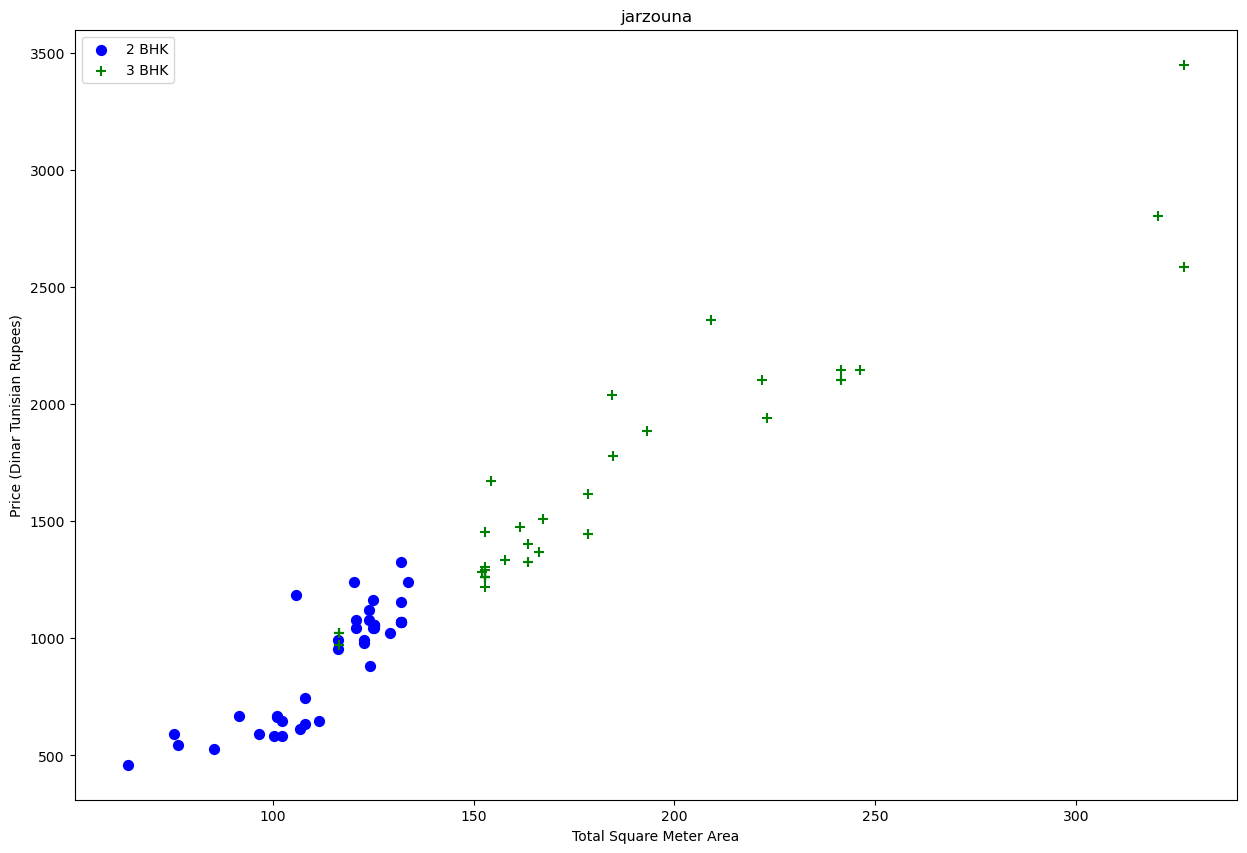

In [268]:
plot_scatter_chart(df9,"jarzouna")
#as we can see the 3 bedrooms appartments in the same area squre meter as the 2 bedrooms appartments were removed

Text(0, 0.5, 'Count')

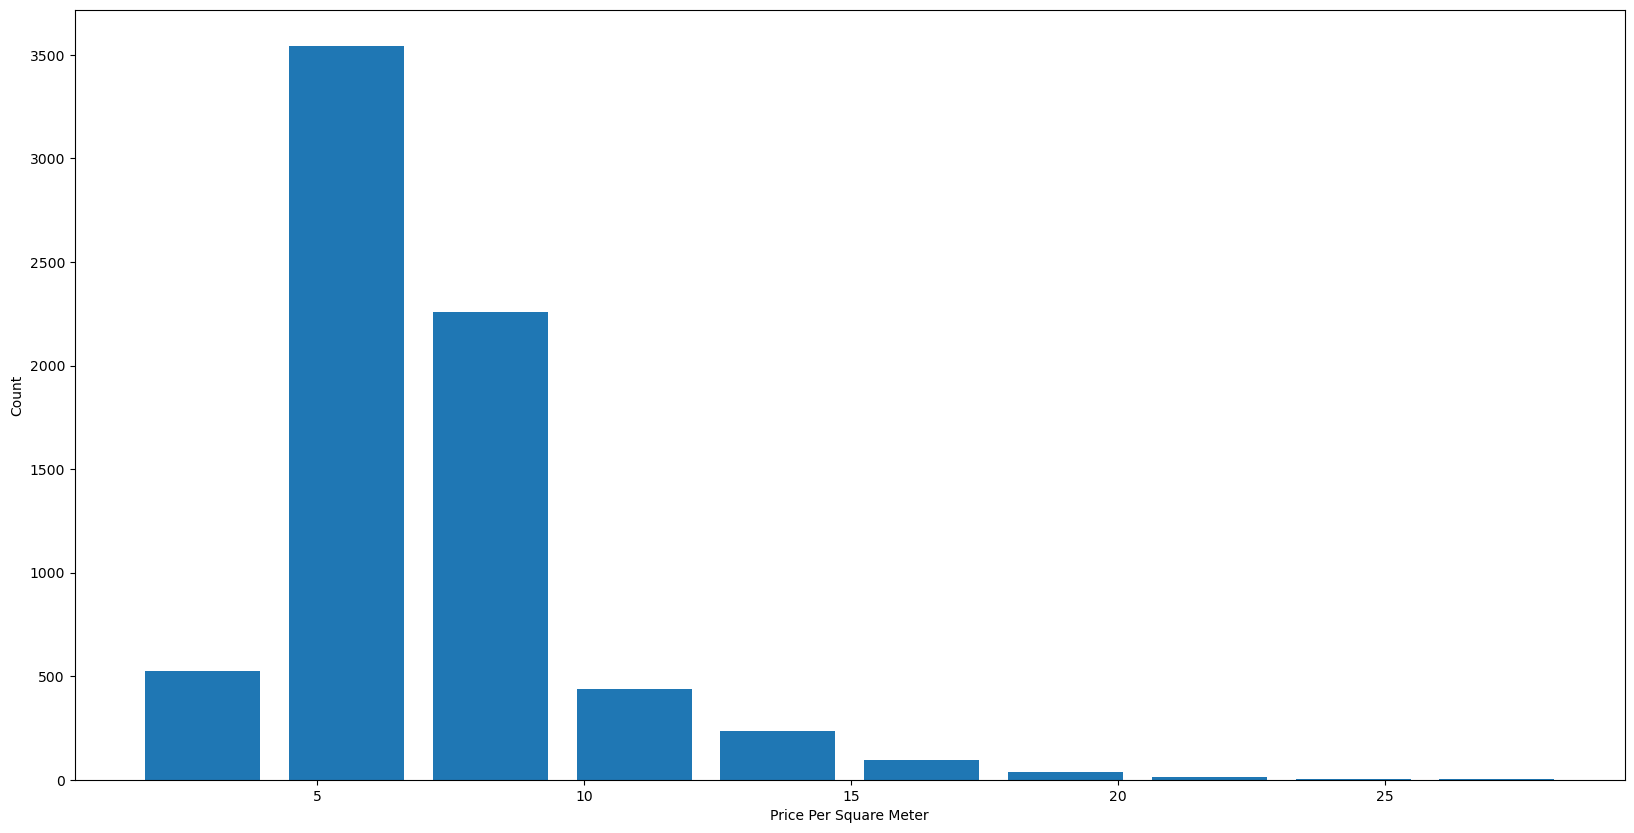

In [269]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df9.price_mDT_per_m2,rwidth=0.8)
plt.xlabel("Price Per Square Meter")
plt.ylabel("Count")

In [270]:
df9.bath.unique()

array([ 2.,  3.,  4.,  1.,  6.,  5.,  8.,  7., 12.,  9., 16., 13.])

In [271]:
df9[df9.bath>10]

,location,size,bath,total_m2,price_mDT,BHK,price_mDT_per_m2
3485,jelma,10 BHK,12.0,371.6000,1724.455607,10,4.640623
6254,other,10 BHK,12.0,1114.8000,5658.369960,10,5.075682
6339,other,16 BHK,16.0,929.0000,5927.816149,16,6.380857
7059,other,11 BHK,12.0,557.4000,1616.677131,11,2.900390
7385,other,13 BHK,13.0,503.9825,2963.908074,13,5.880974


Text(0, 0.5, 'Count')

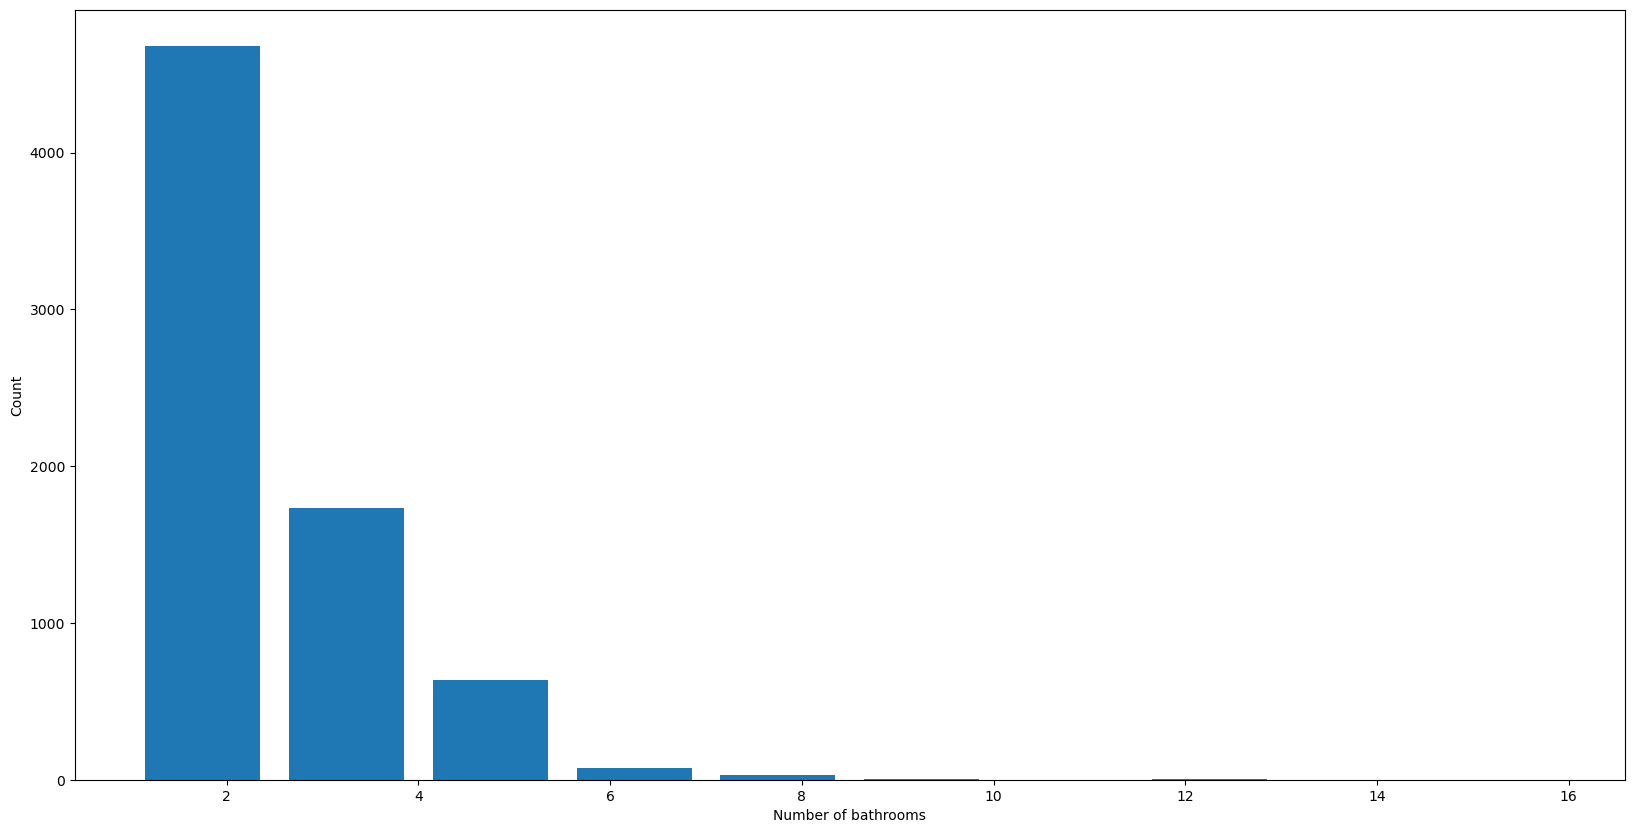

In [272]:
plt.hist(df9.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [273]:
#we are going to remove the appartments that have a number of bedrooms freater than the number of bedrooms +2
df9[df9.bath>df9.BHK+2]

,location,size,bath,total_m2,price_mDT,BHK,price_mDT_per_m2
585,awled hafouz,4 Bedroom,8.0,650.3000,4850.031394,4,7.458145
1355,bradeaa,3 BHK,6.0,167.7774,1250.230315,3,7.451721
5514,mourouj,4 Bedroom,7.0,228.5340,862.227803,4,3.772864
6179,other,6 BHK,9.0,1053.3002,10777.847540,6,10.232456


In [274]:
df10=df9.copy()
df10=df9[df9.bath<df9.BHK +2]
df10.shape

(7084, 7)

In [296]:
df11=df10.copy()
df11=df10.drop(['price_mDT_per_m2'],axis='columns')
#df11['location']=df11['location'].str.upper()
df11['location'] = df11['location'].replace({
    'DEVARACHIKKANAHALLI':'Lac2'
})
df11.location.unique()


array(['Lac2', 'aala', 'aalia', 'aamdoun', 'aamra', 'aarousa', 'akareb',
       'akouda', 'ariana lemdina', 'ariana soghra', 'awled chemekh',
       'awled hafouz', 'bardo', 'bargo', 'beb bhar', 'beb jdid',
       'beb swika', 'beja nord', 'beja sud', 'ben arous', 'ben guerden',
       'beni khaled', 'beni khiar', 'benzert nord', 'benzert sud',
       'bir hafye', 'bir lahmer', 'bir macherka', 'borj cedria',
       'borj l emri', 'bou arada', 'bou hajla', 'bouaarkoub', 'bouficha',
       'boumhal', 'bouselem', 'bradeaa', 'carthage', 'charben', 'chbika',
       'chebba', 'chrarda', 'dahmeni', 'dakach', 'dar chaaben fehri',
       'dhahbya', 'douar hicher', 'douz', 'ein drahem', 'fahs', 'fariena',
       'farnena', 'fawar', 'fouchena', 'fousena', 'gaafour', 'gafsa nord',
       'gafsa sud', 'ghanouch', 'ghar dimaa', 'ghar lmelh', 'ghazela',
       'ghbeli nord', 'ghriba', 'gubeli sud', 'hafouz', 'halk lwed',
       'hamem chatt', 'hamem lanf', 'hammamet', 'hammem sousse',
       'hawarya

In [297]:
#model building
#in a model regression training the content of columns should be numerical.so we have to transform the location column values  into numerical values
dummies=pd.get_dummies(df11.location)
dummies = dummies.astype(int)
dummies.head(3)

,Lac2,aala,aalia,aamdoun,aamra,aarousa,akareb,akouda,ariana lemdina,ariana soghra,...,wed lil,wedi mliz,weslatya,zaghwen,zahra,zanouch,zidi bou zid ouest,zouhour,zouhour gasserine,zriba
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [299]:
df12=pd.concat([df11,dummies.drop('other',axis='columns')],axis='columns')
df12.head(3)

,location,size,bath,total_m2,price_mDT,BHK,Lac2,aala,aalia,aamdoun,...,wed lil,wedi mliz,weslatya,zaghwen,zahra,zanouch,zidi bou zid ouest,zouhour,zouhour gasserine,zriba
1,Lac2,2 BHK,2.0,116.125,431.113902,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Lac2,2 Bedroom,2.0,111.480,894.561346,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lac2,2 BHK,2.0,108.693,431.113902,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [300]:
df12.head(3)

,location,size,bath,total_m2,price_mDT,BHK,Lac2,aala,aalia,aamdoun,...,wed lil,wedi mliz,weslatya,zaghwen,zahra,zanouch,zidi bou zid ouest,zouhour,zouhour gasserine,zriba
1,Lac2,2 BHK,2.0,116.125,431.113902,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Lac2,2 Bedroom,2.0,111.480,894.561346,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lac2,2 BHK,2.0,108.693,431.113902,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [301]:
df13=df12.copy()
df13=df12.drop(['location'],axis='columns')
df13.head(3)

,size,bath,total_m2,price_mDT,BHK,Lac2,aala,aalia,aamdoun,aamra,...,wed lil,wedi mliz,weslatya,zaghwen,zahra,zanouch,zidi bou zid ouest,zouhour,zouhour gasserine,zriba
1,2 BHK,2.0,116.125,431.113902,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2 Bedroom,2.0,111.480,894.561346,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2 BHK,2.0,108.693,431.113902,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [302]:
df12.shape

(7084, 244)

In [309]:
#prepare the x and y for model training
X=df13.drop(['price_mDT','size'],axis='columns')
X.head()

,bath,total_m2,BHK,Lac2,aala,aalia,aamdoun,aamra,aarousa,akareb,...,wed lil,wedi mliz,weslatya,zaghwen,zahra,zanouch,zidi bou zid ouest,zouhour,zouhour gasserine,zriba
1,2.0,116.1250,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,111.4800,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,108.6930,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,132.3825,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.0,87.9763,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [310]:
y=df13.price_mDT
y.head()

1    431.113902
2    894.561346
3    431.113902
4    700.560090
5    463.447444
Name: price_mDT, dtype: float64

In [311]:
#training and testing process
#20% of dataset for model testing
#80% of dataset for model training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [322]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.80169944337568

In [314]:
#we will use a k-fold cross validation to mesure accuracy and to obtain the best optimal model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84663158, 0.80307654, 0.85252373, 0.81587121, 0.84615315])

In [315]:
#find best model using grid search
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'copy_X': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

D:\anc\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anc\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anc\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\anc\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\anc\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise 

,model,best_score,best_params
0,linear_regression,0.832851,{'copy_X': True}
1,lasso,0.786409,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.738603,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [319]:
#as is shown,the linear regression is the best model
#now we are going to test the predicted prices 
def predict_price(location, sqm2, bath, bhk):
    if location in X.columns:
        loc_index = np.where(X.columns == location)[0][0]
    else:
        print(f"Location '{location}' not found in columns.")
        loc_index = -1

    x = np.zeros(len(X.columns))
    x[1] = sqm2
    x[0] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    # Convert the numpy array to a pandas DataFrame
    x_df = pd.DataFrame([x], columns=X.columns)

    return lr_clf.predict(x_df)[0]

In [320]:
predict_price('marsa',92.9, 2, 2)

465.5562377859908

In [321]:
predict_price('marsa',92.9, 3, 3)


483.6173199926968

In [896]:
#export the pickle file
import pickle
with open('tunisian_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [897]:
#export the columns informations in a json file
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [899]:
df12.groupby('location')['location'].agg('count')

location
Lac2                   11
aala                   18
aalia                  11
aamdoun                85
aamra                 109
                     ... 
zanouch                11
zidi bou zid ouest      8
zouhour                15
zouhour gasserine      31
zriba                  26
Name: location, Length: 240, dtype: int64

In [901]:
locations_uniques = df12['location'].nunique()
locations_uniques

240